# MBE-VQO性能测试

In [1]:
import numpy as np
import mindspore as ms
import mindspore.nn as nn
import matplotlib.pyplot as plt
from src.mbe_loss import MBELoss
from src.layer import MBELayer
from src.dataset import *
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

### 优化器

dataset2, L=7, seed=1202

In [2]:
n, problem = build_dataset2()
depth = 7
loss = MBELoss(n, depth)
loss.set_graph(problem)

In [3]:
ms.set_seed(1202)
net = MBELayer(loss)
net.weight.asnumpy()

array([-0.00482855, -0.00430925,  0.00270523,  0.0124913 ,  0.01020902,
        0.00019754,  0.00854646, -0.00491926, -0.01840641, -0.00611393,
        0.00395061,  0.0212934 ,  0.0039248 ,  0.00799224,  0.01025955,
        0.00439241], dtype=float32)

#### Adam

In [4]:
opti = nn.Adam(net.trainable_params(), learning_rate=0.05)
train_net = nn.TrainOneStepCell(net, opti)
cl = []
sco = []
for i in range(120):
    cl.append(train_net().asnumpy()[0])
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))
    if i % 10 == 9:
        print("train step:", i, ", loss:", cl[-1])

train step: 9 , loss: -3.3729408
train step: 19 , loss: -5.445209
train step: 29 , loss: -5.6412544
train step: 39 , loss: -5.8618197
train step: 49 , loss: -5.8893394
train step: 59 , loss: -5.921483
train step: 69 , loss: -5.9274864
train step: 79 , loss: -5.929516
train step: 89 , loss: -5.9308147
train step: 99 , loss: -5.9309783
train step: 109 , loss: -5.9310913
train step: 119 , loss: -5.9311767


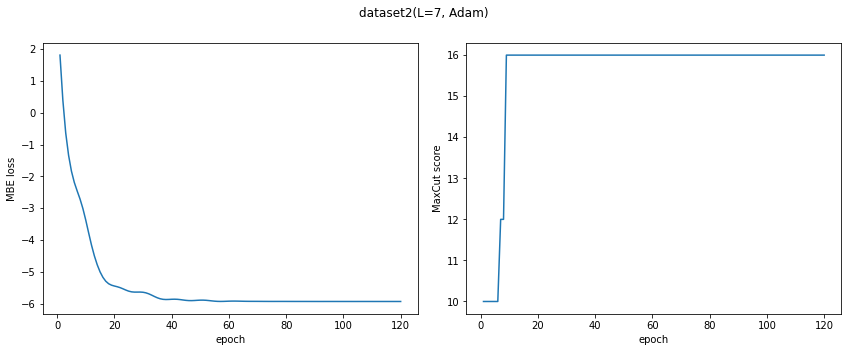

In [5]:
x = np.array(range(len(cl))) + 1
fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1,2)
ax[0].plot(x, cl)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('MBE loss')
ax[1].plot(x, sco)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('MaxCut score')
plt.suptitle('dataset2(L=7, Adam)')
plt.tight_layout(pad=1.5)
plt.show()

##### SGD

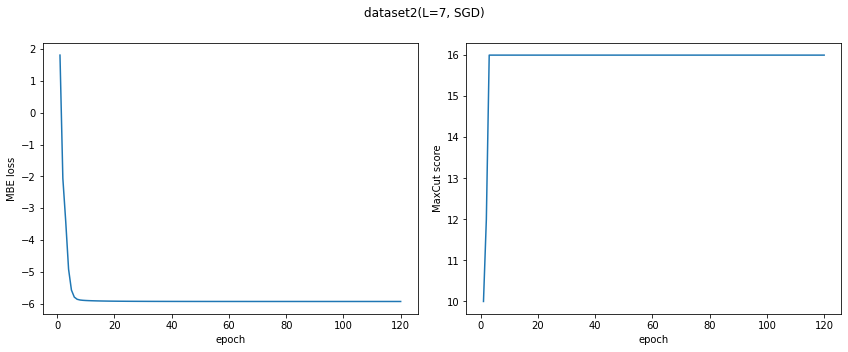

In [6]:
ms.set_seed(1202)
net = MBELayer(loss)
opti = nn.SGD(params=net.trainable_params())
train_net = nn.TrainOneStepCell(net, opti)
cl = []
sco = []
for i in range(120):
    cl.append(train_net().asnumpy()[0])
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))
x = np.array(range(len(cl))) + 1
fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1,2)
ax[0].plot(x, cl)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('MBE loss')
ax[1].plot(x, sco)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('MaxCut score')
plt.suptitle('dataset2(L=7, SGD)')
plt.tight_layout(pad=1.5)
plt.show()

优化性能与优化器的选择有关。

### 线路深度

dataset2, epoch=50, seed=1202

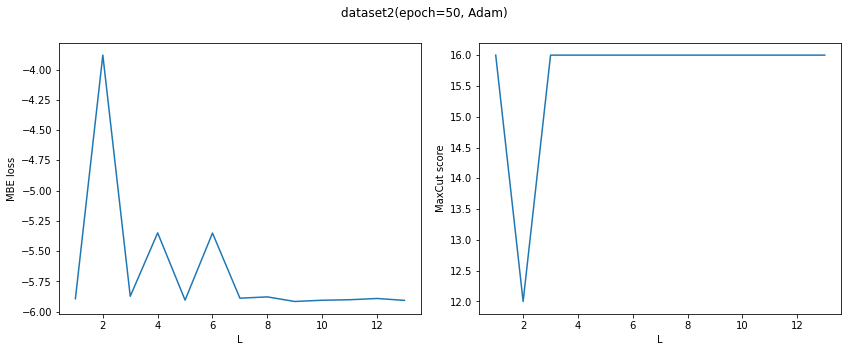

In [8]:
cl = []
sco = []
L = []
for i in range(13):
    L.append(i + 1)
    loss = MBELoss(n, L[-1])
    loss.set_graph(problem)
    ms.set_seed(1202)
    net = MBELayer(loss)
    opti = nn.Adam(net.trainable_params(), learning_rate=0.05)
    train_net = nn.TrainOneStepCell(net, opti)
    for i in range(49):
        train_net()
    cl.append(train_net().asnumpy()[0])
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))
fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1,2)
ax[0].plot(L, cl)
ax[0].set_xlabel('L')
ax[0].set_ylabel('MBE loss')
ax[1].plot(L, sco)
ax[1].set_xlabel('L')
ax[1].set_ylabel('MaxCut score')
plt.suptitle('dataset2(epoch=50, Adam)')
plt.tight_layout(pad=1.5)
plt.show()

似乎奇数深度与L＞6情况下性能良好。

### 初始参数

dataset1

train step: 9 , loss: -1.2925462
train step: 19 , loss: -2.4111576
train step: 29 , loss: -3.0218756
train step: 39 , loss: -3.3990126
train step: 49 , loss: -3.4047012
train step: 59 , loss: -3.4533546


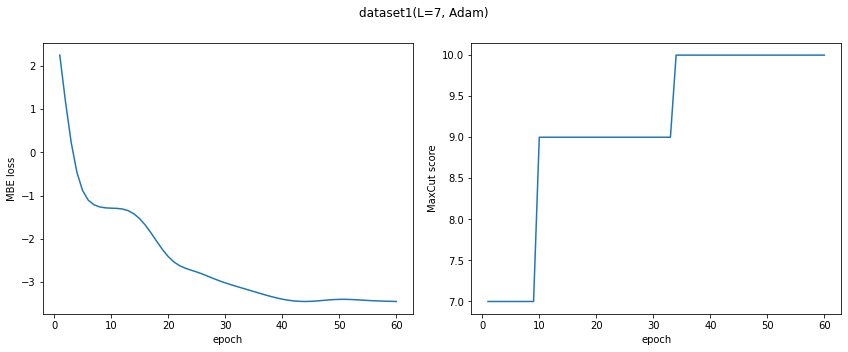

In [17]:
n, problem = build_dataset1()
depth = 7
loss = MBELoss(n, depth)
loss.set_graph(problem)
net = MBELayer(loss)
opti = nn.Adam(net.trainable_params(), learning_rate=0.05)
train_net = nn.TrainOneStepCell(net, opti)
cl = []
sco = []
for i in range(60):
    cl.append(train_net().asnumpy()[0])
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))
    if i % 10 == 9:
        print("train step:", i, ", loss:", cl[-1])
x = np.array(range(len(cl))) + 1
fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1,2)
ax[0].plot(x, cl)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('MBE loss')
ax[1].plot(x, sco)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('MaxCut score')
plt.suptitle('dataset1(L=7, Adam)')
plt.tight_layout(pad=1.5)
plt.show()

train step: 9 , loss: -2.3840601
train step: 19 , loss: -3.3089843
train step: 29 , loss: -3.461369
train step: 39 , loss: -3.4642787
train step: 49 , loss: -3.4647357
train step: 59 , loss: -3.464969


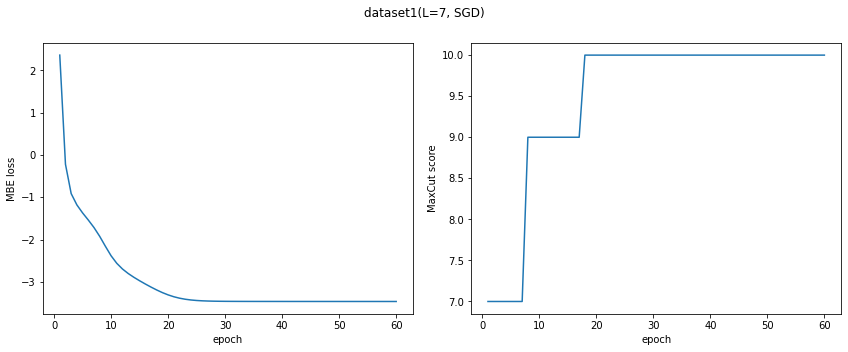

In [22]:
n, problem = build_dataset1()
depth = 7
loss = MBELoss(n, depth)
loss.set_graph(problem)
net = MBELayer(loss)
opti = nn.SGD(net.trainable_params())
train_net = nn.TrainOneStepCell(net, opti)
cl = []
sco = []
for i in range(60):
    cl.append(train_net().asnumpy()[0])
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))
    if i % 10 == 9:
        print("train step:", i, ", loss:", cl[-1])
x = np.array(range(len(cl))) + 1
fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1,2)
ax[0].plot(x, cl)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('MBE loss')
ax[1].plot(x, sco)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('MaxCut score')
plt.suptitle('dataset1(L=7, SGD)')
plt.tight_layout(pad=1.5)
plt.show()

In [23]:
depth = 7
loss = MBELoss(n, depth)
loss.set_graph(problem)
sco = []
for _ in range(20):
    net = MBELayer(loss)
    opti = nn.SGD(net.trainable_params())
    train_net = nn.TrainOneStepCell(net, opti)
    for i in range(30):
        train_net()
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))

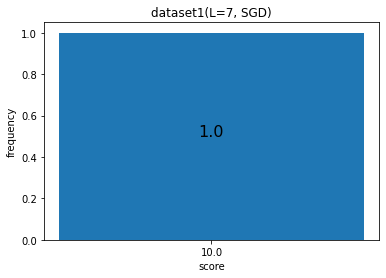

In [32]:
ss = set(sco)
num, val = [], []
for s in ss:
    num.append(sco.count(s))
    val.append(s)
x = list(range(len(val)))
num = np.array(num) / 20
plt.bar(x, num)
plt.xticks(x, val)
for x1, y1 in enumerate(num):
    plt.text(x1, y1/2, y1, ha='center', fontsize=16)
plt.xlabel('score')
plt.ylabel('frequency')
plt.title('dataset1(L=7, SGD)')
plt.show()

dataset3

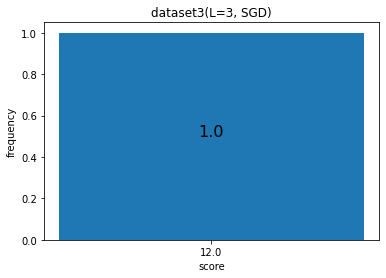

In [34]:
n, problem = build_dataset3()
depth = 3
loss = MBELoss(n, depth)
loss.set_graph(problem)
sco = []
for _ in range(20):
    net = MBELayer(loss)
    opti = nn.SGD(net.trainable_params())
    train_net = nn.TrainOneStepCell(net, opti)
    for i in range(30):
        train_net()
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))
ss = set(sco)
num, val = [], []
for s in ss:
    num.append(sco.count(s))
    val.append(s)
x = list(range(len(val)))
num = np.array(num) / 20
plt.bar(x, num)
plt.xticks(x, val)
for x1, y1 in enumerate(num):
    plt.text(x1, y1/2, y1, ha='center', fontsize=16)
plt.xlabel('score')
plt.ylabel('frequency')
plt.title('dataset3(L=3, SGD)')
plt.show()

使用Adam和SGD优化器时似乎对初始参数不敏感

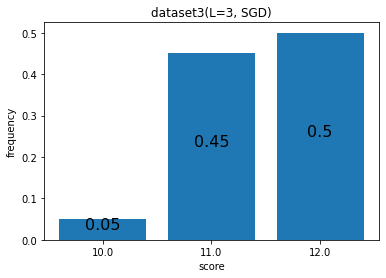

In [37]:
n, problem = build_dataset3()
depth = 3
loss = MBELoss(n, depth)
loss.set_graph(problem)
sco = []
for _ in range(20):
    w = np.random.rand(len(loss.circ.params_name)) * np.pi
    net = MBELayer(loss, ms.Tensor(w, dtype=ms.float32))
    opti = nn.SGD(net.trainable_params())
    train_net = nn.TrainOneStepCell(net, opti)
    for i in range(30):
        train_net()
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))
ss = set(sco)
num, val = [], []
for s in ss:
    num.append(sco.count(s))
    val.append(s)
x = list(range(len(val)))
num = np.array(num) / 20
plt.bar(x, num)
plt.xticks(x, val)
for x1, y1 in enumerate(num):
    plt.text(x1, y1/2, y1, ha='center', fontsize=16)
plt.xlabel('score')
plt.ylabel('frequency')
plt.title('dataset3(L=3, SGD)')
plt.show()

好吧，初始参数选得不好还是可能会收敛到局部最优值~

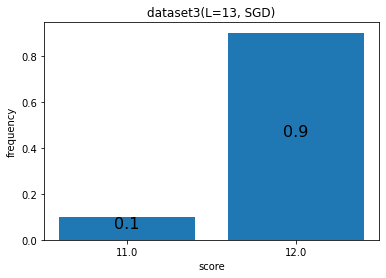

In [43]:
n, problem = build_dataset3()
depth = 13
loss = MBELoss(n, depth)
loss.set_graph(problem)
sco = []
for _ in range(10):
    w = np.random.rand(len(loss.circ.params_name)) * np.pi
    net = MBELayer(loss, ms.Tensor(w, dtype=ms.float32))
    opti = nn.SGD(net.trainable_params())
    train_net = nn.TrainOneStepCell(net, opti)
    for i in range(30):
        train_net()
    w = net.weight.asnumpy()
    r = np.concatenate(loss.measure(w))
    sco.append(score(problem, np.sign(r)))
ss = set(sco)
num, val = [], []
for s in ss:
    num.append(sco.count(s))
    val.append(s)
x = list(range(len(val)))
num = np.array(num) / 10
plt.bar(x, num)
plt.xticks(x, val)
for x1, y1 in enumerate(num):
    plt.text(x1, y1/2, y1, ha='center', fontsize=16)
plt.xlabel('score')
plt.ylabel('frequency')
plt.title('dataset3(L=13, SGD)')
plt.show()

加深线路或许能消除其对局部最小值的敏感性